#What is Dimensionality reduction?

Dimensionality reduction is a machine learning (ML) or statistical technique of reducing the amount of random variables in a problem by obtaining a set of principal variables. This process can be carried out using a number of methods that simplify the modeling of complex problems, eliminate redundancy and reduce the possibility of the model overfitting and thereby including results that do not belong.

#What is PCA?

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

PCA can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

#What is LDA(Linear Discriminant Analysis)?
Linear Discriminant Analysis or LDA is a dimensionality reduction technique. It is used as a pre-processing step in Machine Learning and applications of pattern classification. The goal of LDA is to project the features in higher dimensional space onto a lower-dimensional space in order to avoid the curse of dimensionality and also reduce resources and dimensional costs.

LDA is a supervised classification technique that is considered a part of crafting competitive machine learning models. This category of dimensionality reduction is used in areas like image recognition and predictive analysis in marketing.






# Import Libaries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.decomposition import PCA
from PIL import Image, ImageOps
from sklearn.datasets import load_digits
from sklearn import datasets 
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from keras.datasets import mnist
from sklearn.model_selection import train_test_split


In [7]:
from google.colab import files
uploaded = files.upload()

Saving p.jpg to p.jpg


# PCA Noise Filtering

## PCA Noise Filter on image

### Adding Gaussian and (Pepper and Salt) noise:

In [8]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col= image.shape
        mean = 0
        var = 40
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col))
        gauss = gauss.reshape(row,col)
        noisy = image + gauss
        return noisy
    
    elif noise_typ == "s&p":
        row,col = image.shape
        s_vs_p = 0.5
        amount = 0.1
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        out[coords] = 0
        return out

Importing our image and greyscaling it.

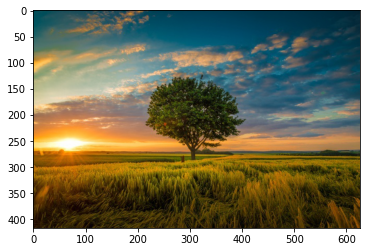

In [9]:
# creating an og_image object
og_image = Image.open("p.jpg")
plt.imshow(og_image)

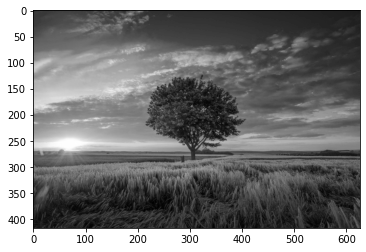

In [10]:
# applying grayscale method
gray_image = ImageOps.grayscale(og_image)
plt.imshow(gray_image,cmap='gray')

In [11]:
gray_image=np.array(gray_image)

Applying both Guassian & Salt&Pepper noise to our image

In [12]:
gaussian=noisy('gauss',gray_image)
pepper_salt=noisy('s&p',gray_image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


This is how our image looks after both noises.

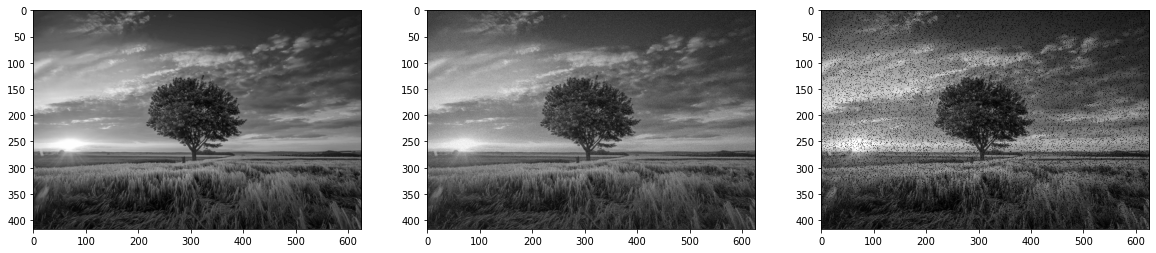

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
ax[0].imshow(gray_image,cmap='gray')
ax[1].imshow(gaussian,cmap='gray')
ax[2].imshow(pepper_salt,cmap='gray')
plt.show()

We will use PCA to denoise our image in both cases,
but first we will denoise the gaussian image.

In [14]:
pca1=PCA()
p1=pca1.fit_transform(gaussian)


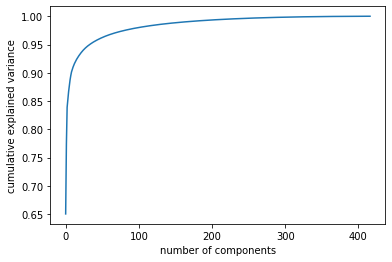

In [15]:
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

After inversing the transform of the PCA for the image with the gaussian noise we can clearly see that the PCA was able to reduce the noise but the noise is still there and haven't been eliminated. 

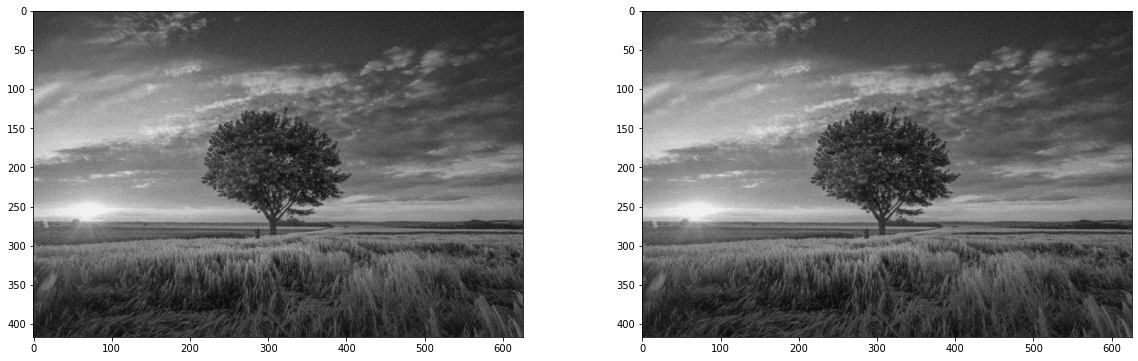

In [16]:
filtered1=pca1.inverse_transform(p1)

fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].imshow(gaussian,cmap='gray')
ax[1].imshow(filtered1,cmap='gray')

### Filtering Pepper and Salt noise

In [17]:
pca2=PCA()
p2=pca2.fit_transform(pepper_salt)


Looking at our Component-Cumulative Explained Variance plot we can see that the salt&pepper noise drastically changed the amount of information for our components unlike the gaussain noise which barely affected it. 

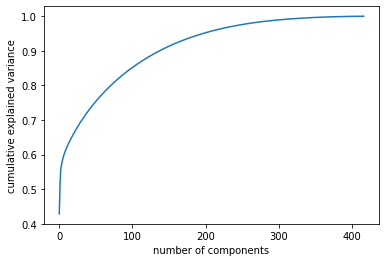

In [18]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

After inversing the transform of the PCA for the image with the S&P noise we won't be able to differentiate between our image before and after denoising which means PCA failed to denoise this kind of noise! 

I think the intuition behind this is that Salt&Pepper noise randomly occur certain amount of pixels into two extremes, either 0 or 255. The noise significantly damages the image information which misled the PCA into getting the information about the original image back.

And it might be cuz the S&P noise has higher variance than our largest principal components of the image.

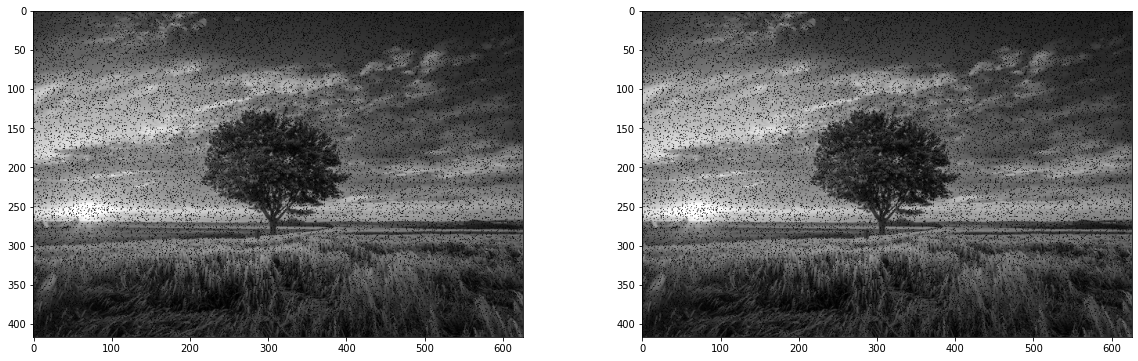

In [19]:
filtered2=pca2.inverse_transform(p2)

fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].imshow(pepper_salt,cmap='gray')
ax[1].imshow(filtered2,cmap='gray')

## PCA Noise Filter on MNIST dataset

In [20]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 56))

11501568/11490434 [==============================] - 0s 0us/step
X:  (70000, 28, 28)
y:  (70000,)


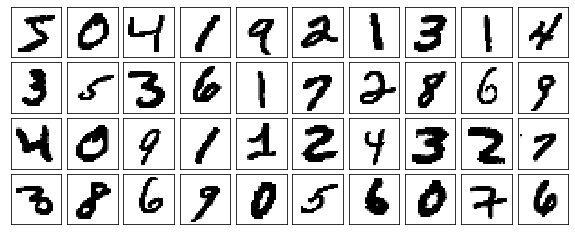

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

print('X: ' , X.shape)
print('y: ' , y.shape)

plot_digits(X)

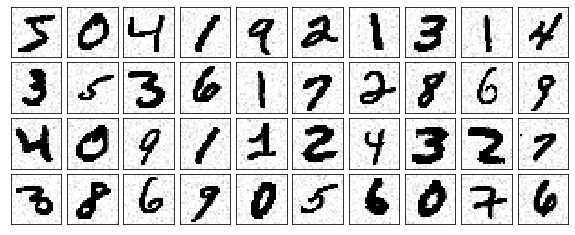

In [22]:
np.random.seed(42)
noisy = np.random.normal(X, 4)
plot_digits(noisy)

Text(0, 0.5, 'cumulative explained variance')

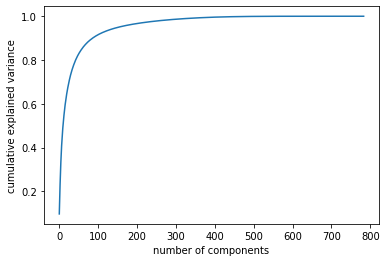

In [23]:

pca = PCA().fit(X.reshape(70000,28*28))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


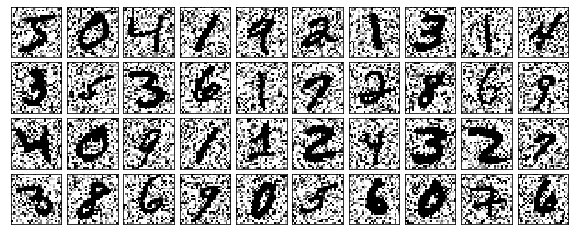

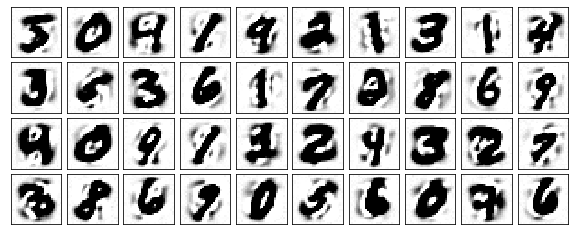

In [24]:
pca = PCA(0.5)  
np.random.seed(42)
noise = np.random.normal(size=X.shape,scale=50)
noisy=X+noise
plot_digits(noisy)

components = pca.fit_transform(noisy.reshape(70000,28*28))
filtered = pca.inverse_transform(components)
plot_digits(filtered)


**We Can Say that after removing noise from data, it looks a bit like the orginal data**

# Using LDA as a decorelation technique:



We're creating highly correlated data that consists of three features using numpy random.multivariate_normal function which takes the our predefined mean and covariance matrix of the features as parameters. 

In [25]:
def Generate_data(num_samples = 400):
  #mean values of the sample.
  mu = np.array([5.0, 0.0, 10.0])

  #covariance matrix.
  r = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])
  
  
  # Generate the random samples.
  np.random.seed(42)
  x = np.random.multivariate_normal(mu, r, size=num_samples)
  # Generate the labels.
  split=(x[:,2]<=9)+(x[:,2]>=11)
  y=np.array(split).astype(int).reshape(-1,)

  return x, y

In [26]:
def plot_clusters(X, y=None):
  fig, ax = plt.subplots(1, 3, figsize=(20, 6))
  sns.scatterplot(X[:, 0], X[:, 1], data=X, hue=y, ax=ax[0])
  sns.scatterplot(X[:, 0], X[:, 2], data=X, hue=y, ax=ax[1])
  sns.scatterplot(X[:, 1], X[:, 2], data=X, hue=y, ax=ax[2])
  plt.show()


In [27]:
X,y = Generate_data()
nX=pd.DataFrame(X)
nY=pd.DataFrame(y)
x_train, x_test, y_train, y_test = train_test_split(nX,nY, random_state=42)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


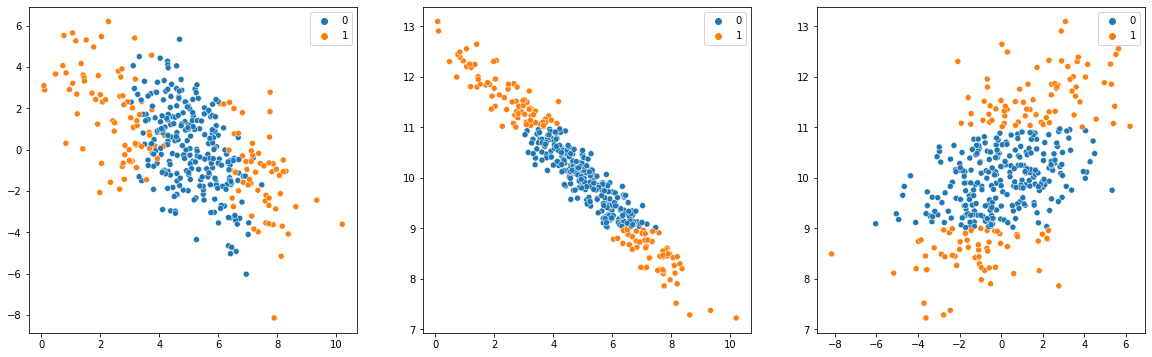

In [28]:
plot_clusters(X, y)

As we can see the data we succesfully decorrelated without even reducing the number of components.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


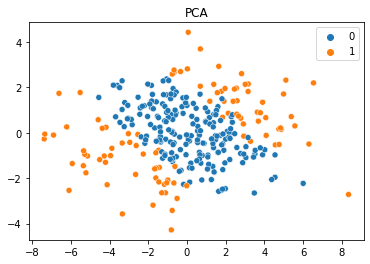

In [32]:
  pca = PCA()  
  pca_x_train = pca.fit_transform(x_train)
  sns.scatterplot(pca_x_train[:,0],pca_x_train[:,1],hue=y_train.to_numpy().reshape(-1,))
  plt.title("PCA")
  plt.show()

Now it's time to pass the data through the LDA.

In [35]:
def test_lda(x_train, y_train,x_test, y_test):
  clf = LDA(n_components=2)
  clf.fit(x_train, y_train)
  print('LDA Score : ',clf.score(x_test, y_test))
  
test_lda(x_train, y_train,x_test, y_test)

LDA Score :  0.63


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [36]:
pca_x_test = pca.transform(x_test)
test_lda(pca_x_train, y_train,pca_x_test, y_test)

LDA Score :  0.63


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
